# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [21]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [22]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

NameError: name 'results' is not defined

The next code cell visualizes the velocity of the quadcopter.

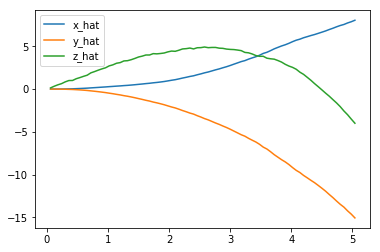

In [24]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

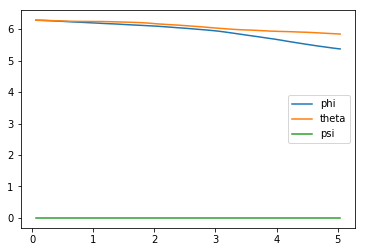

In [25]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

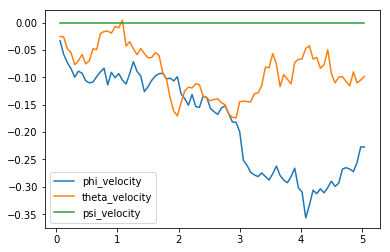

In [26]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

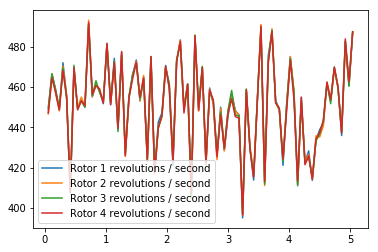

In [27]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [28]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 13.51172726 -23.55535538  23.09695094   5.37068155   5.8443836    0.        ]
[  8.04283316 -15.05776364  -3.99284343]
[-0.22741676 -0.09821984  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [52]:
import sys
import csv
import numpy as np
import pandas as pd
from agents.agent import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=np.array([0,0,5,0,0,0]),target_pos=target_pos)
agent = PolicySearch_Agent(task)

track_rewards = []

done = False
labels = ['time', 'x', 'y', 'z']
results = {x : [] for x in labels}
file_output = 'agent_data.txt'

with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(reward, done)
            state = next_state
            to_write = [task.sim.time] + list(task.sim.pose)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
                writer.writerow(to_write)
            if done:
                track_rewards.append(agent.best_score)

                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                    i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
                break
        sys.stdout.flush()

Episode = 1000, score =   6.764 (best =   6.766), noise_scale = 3.255

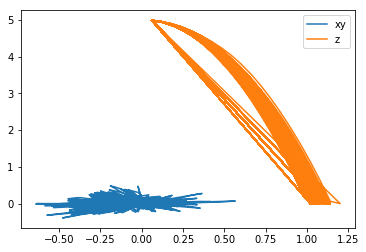

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.plot(results['time'], results['x'], label='x')
#plt.plot(results['time'], results['y'], label='y')
plt.plot(results['x'], results['y'], label='xy')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

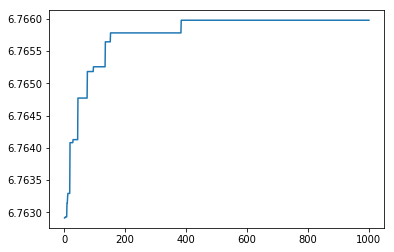

In [64]:
plt.plot(range(1, len(track_rewards)+1), track_rewards, label='reward')

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [1]:
## TODO: Train your agent here.
import sys
import numpy as np
import pandas as pd
from agents.ddpg_agent import DDPG
from task import Task

num_episodes = 1500
target_pos = np.array([0., 0., 60.])
task = Task(init_pose=np.array([0.,0.,3.,0.,0.,0.]),target_pos=target_pos)
agent = DDPG(task)

track_total_rewards = []
rewards_table = []
track_best_reward = []
track_final_z = []
track_best_z = []

done = False
labels = ['time', 'x', 'y', 'z']
results = {x : [] for x in labels}

print_interval = 25

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    rewards = []
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        rewards.append(reward)
        state = next_state
        to_write = [task.sim.time] + list(task.sim.pose)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        if done:
            track_total_rewards.append(agent.reward_total)
            track_best_reward.append(agent.reward_best)
            track_final_z.append(state[2])
            track_best_z.append(agent.best_z)
            rewards_table.append(rewards)
            if i_episode % print_interval == 0:
                print("\rEpisode = {:4d}, Mean Reward {:3.3f}, Mean Z {:3.3f}, Max Reward {:3.3f}, Best Z {:3.3f}"
                      .format(i_episode, np.mean(track_best_reward[-print_interval:]),  np.mean(track_final_z[-print_interval:]), np.max(track_best_reward), np.min(track_best_z)))
            break
    sys.stdout.flush()

Using TensorFlow backend.


Episode =   25, Mean Reward -76.312, Mean Z 0.151, Max Reward -45.525, Best Z 59.268
Episode =   50, Mean Reward -91.107, Mean Z 0.124, Max Reward -44.042, Best Z 59.187
Episode =   75, Mean Reward -102.061, Mean Z 0.092, Max Reward -41.132, Best Z 58.885
Episode =  100, Mean Reward -90.892, Mean Z 0.094, Max Reward -41.132, Best Z 58.885
Episode =  125, Mean Reward -46.237, Mean Z 0.195, Max Reward -41.132, Best Z 58.885
Episode =  150, Mean Reward -46.237, Mean Z 0.195, Max Reward -41.132, Best Z 58.885
Episode =  175, Mean Reward -46.237, Mean Z 0.195, Max Reward -41.132, Best Z 58.885
Episode =  200, Mean Reward -46.237, Mean Z 0.198, Max Reward -41.132, Best Z 58.885
Episode =  225, Mean Reward -46.237, Mean Z 0.195, Max Reward -41.132, Best Z 58.885
Episode =  250, Mean Reward -58.219, Mean Z 0.172, Max Reward -41.132, Best Z 58.885
Episode =  275, Mean Reward -92.183, Mean Z 0.088, Max Reward -41.132, Best Z 58.885
Episode =  300, Mean Reward -88.285, Mean Z 0.112, Max Reward -4

KeyboardInterrupt: 

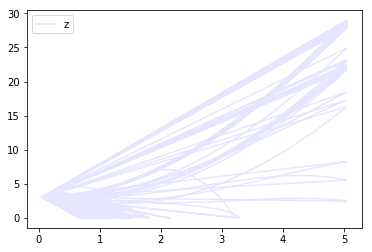

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results['time'], results['z'], alpha=0.1, color='b', label='z')
plt.legend()
_ = plt.ylim()

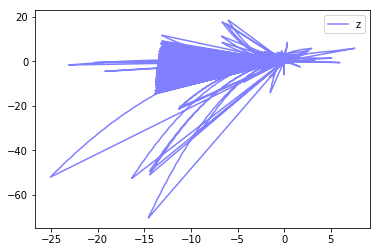

In [3]:
plt.plot(results['x'], results['y'], alpha=0.5, color='b', label='z')
plt.legend()
_ = plt.ylim()

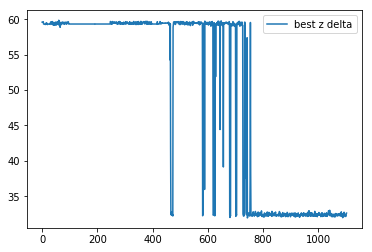

In [4]:
plt.plot(track_best_z, label='best z delta')
plt.legend()
_ = plt.ylim()

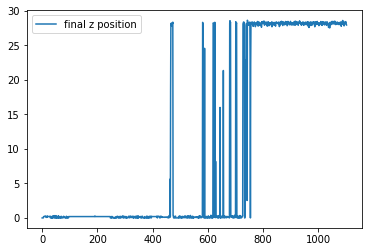

In [5]:
plt.plot(track_final_z, label='final z position')
plt.legend()
_ = plt.ylim()

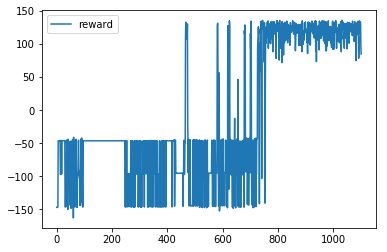

In [6]:
plt.plot(track_best_reward, label='reward')
plt.legend()
_ = plt.ylim()

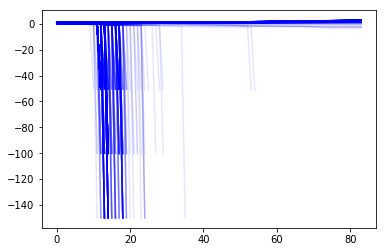

In [8]:
for rewards in rewards_table:
    plt.plot(rewards, alpha=0.1, color='b')
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I tried a lot of different takeoff scenarios.  Started with XYZ 0,0,0 and moving to 0,0,10.  That didn't work very well, a lot of overshooting the Z position and X,Y were all over the place.  I tried to constrain X,Y by putting a stiff penalty of -1 on each step where X or Y were beyond some bounding limit (something in the 3-5 range).  That constrained X and Y coordinates but the reward curves would fall off rapidly, which lead to no real learning.  So I removed the X,Y penatly and just relied on the summed difference of XYZ actual position from target XYZ.  I also applied tanh normalization to the difference between the scaled sum difference, and played with the scaling factor for the error to give a reward range that increases from 0 to 0.995 as Z moves from 0 to 60, and smoothly penalizes deviations from X,Y 0,0 and overshoots of Z.  The normalization is shown below:  

        delta = abs(self.sim.pose[:3] - self.target_pos).sum()
        reward = np.tanh(3.-(.05*delta))

That kept the reward signal from running away, and makes increases toward 60 the easiest way to increase reward.  I then tried starting from just off the ground (Z = 1) and setting a higher target Z position (raised to 60) in order to give the quadcopter a little more room to ramp up.  That seemed to work pretty OK and learning occured very early, but the quadcopter seemed to figure out that the easiest way to accumulate reward was staying close to X,Y 0,0 without really trying to explore the Z axis.  To force exploration along Z I just started a bit higher at Z = 5.  This allowed exploration of the reward gradient along Z even if the quadcopter was just crashing.  It eventually figured out that moving up the Z axis yields nice rewards and began to accumulate reward quickly between runs 225 - 250.  After that there were another couple of periods of nice flights, where the quadcopter eased up to withing 0.452 of Z = 60 without crashing and a solution was beginning to emerge toward the end of the batch around run 1350.  

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:  I first tried a simple neural network consisting of 128, 64, and 32 unit dense layers.  That did not learn well at all.  I then switched to the recommended architecture of 400, 300, and 200 unit dense layers each followed by a batch normalization and relu layer.  That seemed to learn well.  Even after only 25 runs the quadcopter achieved a couple of decent attempts, coming within a few units of the target Z position.  There was some subsequent overshooting, but it looks like the position was slowly working back down toward the target.  I stopped this simulation early because the point seems to have already been made.  I didn't tweak the hyperparameters because I honestly still am not entirely sure how to predict what results will be produced by changing them. 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
The agent seemed to have difficulty at first.  Mostly tumbling straight to the ground and collecting little cummulative reward.  There seemed to be a moment where the quadcopter discovered that moving along the Z axis could rapidly accumulate reward.  This strategy was applied in a couple of different phases and the mean reward reached a maximum around run 1375 when a strategy for reaching Z = 60 without crashing began to emerge.  This pattern of flight and reward acculumation is clearly visible in the rewards plot above.  Overall, I think there was a decent amount of learning and the quadcopter was beginning to discover a reasonable strategy; however, more learning is clearly necessary to crystalize on a reliable solution.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:  It was all hard...haha.  But the hardest was figuring out how to scale the error and normalize the reward signal to improve learning.  I thought it was interesting that the quadcopter wouldn't bother exploring the Z axis when starting at a very low height (although I didn't try starting from 0), and had to be 'forced' to do so by letting it fall from a higher starting point.  Maybe with longer training time it would've eventually started moving up to try to maximize the cumulative reward, but who knows.  Plotting was not too difficult, but figuring out where all the data is stored that I want to track and plot took a while.  Designing the actor and critic neural networks wasn't too difficult because the research paper gave the recommended architecture and parameters, but I would've been completely lost if I had to design a suitable architecture from scratch.


UPDATE:
I made the suggested changes: 1) implemented a penalty for crashing; 2) reward boost for ending within a few units of the target Z height; 3) small reward boost for positive z velocity to encourage exploring vertical lift; 4) added dropout layers to avoid overfitting; 5) played with the learning rate of adam optimizer.

These changes definitely improved learning.  While the quadcopter never achieved the target height it did learn to stay in the air, with reward stabilizing after about 800 runs.  Prior to that there were a couple of attempts to get in the air, but this strategy didn't really appear to solidify until about 800 runs.  Thank you for the suggestions for improving the learning of my quadcopter!